In [23]:
# !unzip final_data.zip

In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import os 

import tensorflow as tf

In [25]:
dir_path = "/content/final_data/"
os.listdir(dir_path)

['valid', 'valid_labels.csv', 'train_labels.csv', 'train', 'test']

In [26]:
train_images_path = "/content/final_data/train/"
test_images_path = "/content/final_data/test/"

In [27]:
labels_df = pd.read_csv(dir_path + 'train_labels.csv')
print(labels_df.head())
print(labels_df.describe())

     filenames  label
0  train/0.jpg     12
1  train/1.jpg     33
2  train/2.jpg      4
3  train/3.jpg     42
4  train/4.jpg     26
             label
count  4955.000000
mean     24.737639
std      14.412145
min       0.000000
25%      12.000000
50%      25.000000
75%      37.000000
max      49.000000


In [28]:
def is_equal_images(target_dir, target_df): 
    """
    This function will check if target_dir images are equal to image list in target_df
    """
    len_target_dir = len(os.listdir(target_dir))
    len_target_df = len(target_df)
    if len_target_dir == len_target_df: 
        print(f"Both are having same no of images:{len_target_dir}")
    else: 
        print(f"Target dir having {len_target_dir} images while Target DF having {len_target_df}")
        
is_equal_images(target_dir = train_images_path, target_df = labels_df)

Both are having same no of images:4955


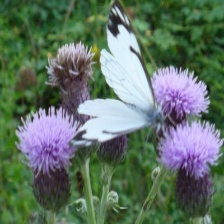

In [29]:
from IPython.display import Image, display
Image(train_images_path + '7.jpg')

In [30]:
labels_df['filenames']

0          train/0.jpg
1          train/1.jpg
2          train/2.jpg
3          train/3.jpg
4          train/4.jpg
             ...      
4950    train/4950.jpg
4951    train/4951.jpg
4952    train/4952.jpg
4953    train/4953.jpg
4954    train/4954.jpg
Name: filenames, Length: 4955, dtype: object

In [31]:
filenames = [fname for fname in labels_df['filenames']]
filenames[:10]

['train/0.jpg',
 'train/1.jpg',
 'train/2.jpg',
 'train/3.jpg',
 'train/4.jpg',
 'train/5.jpg',
 'train/6.jpg',
 'train/7.jpg',
 'train/8.jpg',
 'train/9.jpg']

In [32]:
class_names = labels_df['label'].unique()
class_names[:10]

array([12, 33,  4, 42, 26,  0,  2, 31, 25, 18])

In [33]:
target_labels = [breed for breed in labels_df['label']]
target_labels[:10]

[12, 33, 4, 42, 26, 0, 2, 31, 25, 18]

In [34]:
print(target_labels[0])
target_labels[0] == class_names

12


array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [35]:
target_labels_encoded = [label == np.array(class_names) for label in target_labels]
target_labels_encoded[:2]

[array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False]),
 array([False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False])]

In [36]:
print(target_labels[0]) # original label
print(np.where(class_names == target_labels[0])[0][0]) # index where label occurs
print(target_labels_encoded[0].argmax()) # index where label occurs in boolean array
print(target_labels_encoded[0].astype(int))

12
0
0
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [37]:
from sklearn.model_selection import train_test_split 

#Experiement with small data 1000 images 
NUM_IMAGES = 2000

#Split data into training & validation 
X_train, X_val, Y_train, Y_val = train_test_split(filenames[:NUM_IMAGES], target_labels_encoded[:NUM_IMAGES], test_size=0.2, random_state=42)

len(X_train), len(X_val), len(Y_train), len(Y_val)

(1600, 400, 1600, 400)

In [38]:
X_train

['train/968.jpg',
 'train/240.jpg',
 'train/819.jpg',
 'train/692.jpg',
 'train/420.jpg',
 'train/1085.jpg',
 'train/1998.jpg',
 'train/365.jpg',
 'train/1022.jpg',
 'train/1240.jpg',
 'train/588.jpg',
 'train/736.jpg',
 'train/1761.jpg',
 'train/941.jpg',
 'train/71.jpg',
 'train/1407.jpg',
 'train/259.jpg',
 'train/51.jpg',
 'train/198.jpg',
 'train/1788.jpg',
 'train/650.jpg',
 'train/332.jpg',
 'train/1359.jpg',
 'train/593.jpg',
 'train/1391.jpg',
 'train/1800.jpg',
 'train/1314.jpg',
 'train/1111.jpg',
 'train/1006.jpg',
 'train/1326.jpg',
 'train/426.jpg',
 'train/1558.jpg',
 'train/1293.jpg',
 'train/590.jpg',
 'train/1957.jpg',
 'train/1976.jpg',
 'train/1132.jpg',
 'train/985.jpg',
 'train/398.jpg',
 'train/1511.jpg',
 'train/436.jpg',
 'train/192.jpg',
 'train/1435.jpg',
 'train/614.jpg',
 'train/1493.jpg',
 'train/576.jpg',
 'train/986.jpg',
 'train/1432.jpg',
 'train/706.jpg',
 'train/1258.jpg',
 'train/141.jpg',
 'train/1357.jpg',
 'train/2.jpg',
 'train/1221.jpg',
 'trai

In [39]:
train_images_path = '/content/final_data/'
test_images_path = '/content/final_data/'

Image Shape: (224, 224, 3)


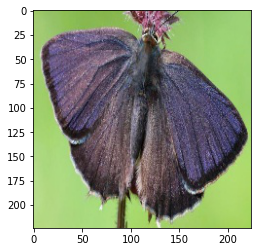

In [40]:
from matplotlib.pyplot import imread

img = imread(train_images_path + X_train[0])
plt.imshow(img)
print(f"Image Shape: {img.shape}")

In [41]:
tf.constant(img)


<tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[159, 198, 107],
        [161, 200, 109],
        [161, 200, 107],
        ...,
        [158, 209, 117],
        [156, 207, 115],
        [157, 208, 116]],

       [[160, 199, 106],
        [162, 201, 108],
        [162, 201, 108],
        ...,
        [158, 209, 117],
        [156, 207, 115],
        [157, 208, 116]],

       [[160, 199, 106],
        [161, 200, 107],
        [160, 201, 107],
        ...,
        [158, 209, 117],
        [156, 207, 115],
        [157, 208, 116]],

       ...,

       [[178, 218, 130],
        [178, 218, 130],
        [178, 218, 130],
        ...,
        [161, 211,  90],
        [161, 211,  90],
        [161, 211,  90]],

       [[178, 218, 130],
        [178, 218, 130],
        [178, 218, 130],
        ...,
        [161, 211,  90],
        [160, 210,  89],
        [160, 210,  89]],

       [[178, 218, 130],
        [178, 218, 130],
        [178, 218, 130],
        ...,
        [161, 211,  9

In [42]:
tf.image.convert_image_dtype(img, tf.float32)

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.62352943, 0.77647066, 0.41960788],
        [0.6313726 , 0.7843138 , 0.427451  ],
        [0.6313726 , 0.7843138 , 0.41960788],
        ...,
        [0.61960787, 0.8196079 , 0.45882356],
        [0.6117647 , 0.8117648 , 0.45098042],
        [0.6156863 , 0.81568635, 0.454902  ]],

       [[0.627451  , 0.7803922 , 0.4156863 ],
        [0.63529414, 0.78823537, 0.42352945],
        [0.63529414, 0.78823537, 0.42352945],
        ...,
        [0.61960787, 0.8196079 , 0.45882356],
        [0.6117647 , 0.8117648 , 0.45098042],
        [0.6156863 , 0.81568635, 0.454902  ]],

       [[0.627451  , 0.7803922 , 0.4156863 ],
        [0.6313726 , 0.7843138 , 0.41960788],
        [0.627451  , 0.78823537, 0.41960788],
        ...,
        [0.61960787, 0.8196079 , 0.45882356],
        [0.6117647 , 0.8117648 , 0.45098042],
        [0.6156863 , 0.81568635, 0.454902  ]],

       ...,

       [[0.69803923, 0.854902  , 0.50980395],
        [0.69

In [43]:
IMAGE_SIZE = 224

# Lets write our preprocessing function
def process_image(image_path): 
    """
    This function will read image, resize the image and return into TF format. 
    Arguments: 
        image_path(str): Path of image
    Returns: 
        img: Tensor image
    """
    img = tf.io.read_file(image_path)
    # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
    img = tf.io.decode_image(img, channels =3)
    # Convert the colour channel values from 0-225 values to 0-1 values
    img = tf.image.convert_image_dtype(img, tf.float32)
    # Resize the image to our desired size (224, 244)
    img = tf.image.resize_with_crop_or_pad(img, 224, 224)
    return img


In [44]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
    """
    Takes an image file path name and the associated label,
    processes the image and returns a tuple of (image, label).
    """
    image = process_image(train_images_path + image_path)
    return image, label

get_image_label(X_train[10], Y_train[10])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.20392159, 0.34117648, 0.12941177],
         [0.20392159, 0.34117648, 0.12941177],
         [0.20000002, 0.34901962, 0.1254902 ],
         ...,
         [0.09019608, 0.27058825, 0.        ],
         [0.08627451, 0.26666668, 0.        ],
         [0.08627451, 0.26666668, 0.        ]],
 
        [[0.20392159, 0.34117648, 0.12941177],
         [0.20392159, 0.34117648, 0.12941177],
         [0.20000002, 0.34901962, 0.1254902 ],
         ...,
         [0.09803922, 0.2784314 , 0.        ],
         [0.09019608, 0.27058825, 0.        ],
         [0.08627451, 0.26666668, 0.        ]],
 
        [[0.19607845, 0.34117648, 0.12941177],
         [0.19607845, 0.34117648, 0.12941177],
         [0.19607845, 0.34509805, 0.12156864],
         ...,
         [0.10588236, 0.28627452, 0.00392157],
         [0.09411766, 0.27450982, 0.        ],
         [0.09019608, 0.27058825, 0.        ]],
 
        ...,
 
        [[0.18039216, 0.3254902 

In [45]:
BATCH_SIZE = 32 

#Create function to create dataset batches 
def create_data_batches(X, y=None, batch_size = BATCH_SIZE, valid_data= False, test_data=False): 
    """
    This function will help to accept Train Images (X) and labels (y). 
    Also Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
    Also accepts test data as input (no labels).
    """
    if test_data: 
        print("Creating Test data")
        test_data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
        test_data = test_data.map(process_image).batch(BATCH_SIZE) 
        return test_data 
    
    #Create validation data
    if valid_data: 
        print("Creating Validation data")
        valid_data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
        valid_data = valid_data.map(get_image_label).batch(BATCH_SIZE)
        return valid_data
    
    #Shuffle and create training data
    else: 
        print("Creating Training Data") 
        train_data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y))).shuffle(buffer_size = len(X))
        train_data = train_data.map(get_image_label).batch(BATCH_SIZE) 
        return train_data

In [46]:
train_data = create_data_batches(X_train, Y_train)
valid_data = create_data_batches(X_val, Y_val, valid_data= True)

Creating Training Data
Creating Validation data


In [47]:
sample =next(iter(train_data))
sample[0][0]

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.37254903, 0.40784317, 0.0509804 ],
        [0.3529412 , 0.38823533, 0.03921569],
        [0.31764707, 0.34901962, 0.01176471],
        ...,
        [0.3803922 , 0.5372549 , 0.05490196],
        [0.39607847, 0.5529412 , 0.07058824],
        [0.3647059 , 0.52156866, 0.03921569]],

       [[0.3803922 , 0.4156863 , 0.05882353],
        [0.35686275, 0.3921569 , 0.03529412],
        [0.35686275, 0.38823533, 0.0509804 ],
        ...,
        [0.4156863 , 0.57254905, 0.09019608],
        [0.4039216 , 0.56078434, 0.07843138],
        [0.38823533, 0.54509807, 0.0627451 ]],

       [[0.35686275, 0.3921569 , 0.02745098],
        [0.3372549 , 0.37254903, 0.01568628],
        [0.29411766, 0.3254902 , 0.        ],
        ...,
        [0.37647063, 0.53333336, 0.04313726],
        [0.39607847, 0.5529412 , 0.07058824],
        [0.40000004, 0.5568628 , 0.07450981]],

       ...,

       [[0.29803923, 0.42352945, 0.03529412],
        [0.29

In [48]:
import matplotlib.pyplot as plt 

def show_images(images, label): 
    """
    Display 25 Images with labels. 
    """
    #Setup the figure 
    plt.figure(figsize = (12,12)) 
    for i in range(0,25): 
        ax = plt.subplot(5, 5, i+1)
        
        plt.imshow(images[i])
        
        plt.title(class_names[tf.argmax(label[i])])
        
        plt.axis("off")

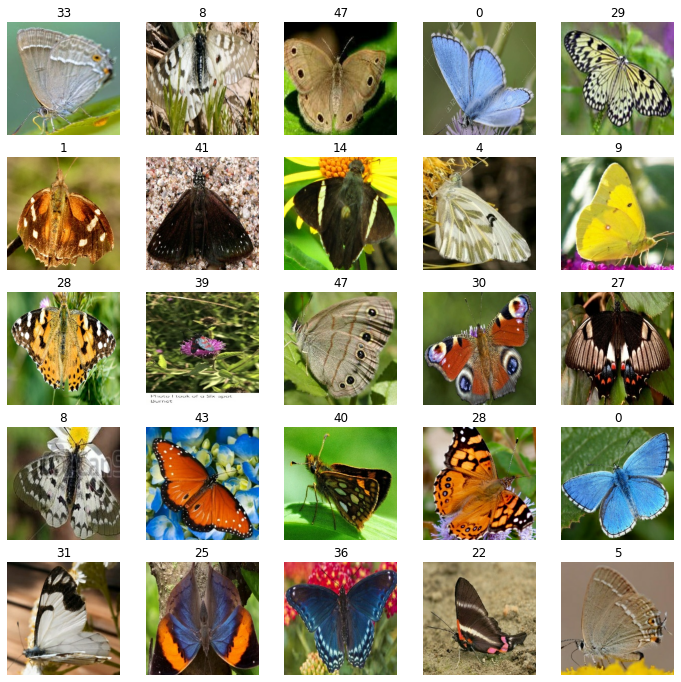

In [49]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_images(train_images, train_labels)

**MODEL**

In [50]:
import tensorflow as tf 
from tensorflow.keras import layers 

def create_model():
    base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = False, 
                                                     classes = len(class_names)) 
    base_model.trainable = False 

    inputs = layers.Input(shape = (224,224,3))
    x = base_model(inputs, training = False) 
    x = tf.keras.layers.GlobalAveragePooling2D(name= "global_average_pooling")(x)
    x = layers.Dropout(0.2)(x)
    outputs = tf.keras.layers.Dense(len(class_names), activation="softmax")(x)


    ModelDogBreed = tf.keras.Model(inputs, outputs) 

    ModelDogBreed.compile(loss = "categorical_crossentropy", 
                         optimizer = tf.keras.optimizers.Adam(), 
                         metrics=["accuracy"]) 

    return ModelDogBreed

In [51]:
model = create_model()

# Callbacks 

EarlyStoppingCallbacks = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=2, baseline=None, restore_best_weights=True
)

9420800/9406464 [==============================] - 0s 0us/step


In [52]:
ModelDogBreed_History = model.fit(train_data, 
                                         steps_per_epoch = len(train_data),
                                         epochs = 5, 
                                         validation_data= valid_data, 
                                         validation_steps = len(valid_data),
                                         callbacks = [EarlyStoppingCallbacks])

Epoch 1/5
50/50 [==============================] - 18s 138ms/step - loss: 3.0887 - accuracy: 0.2537 - val_loss: 2.0255 - val_accuracy: 0.5450
Epoch 2/5
50/50 [==============================] - 6s 110ms/step - loss: 1.4318 - accuracy: 0.7075 - val_loss: 1.3247 - val_accuracy: 0.7075
Epoch 3/5
50/50 [==============================] - 6s 118ms/step - loss: 0.9004 - accuracy: 0.8144 - val_loss: 1.0180 - val_accuracy: 0.7575
Epoch 4/5
50/50 [==============================] - 6s 120ms/step - loss: 0.6317 - accuracy: 0.8844 - val_loss: 0.8945 - val_accuracy: 0.7850
Epoch 5/5
50/50 [==============================] - 7s 130ms/step - loss: 0.4912 - accuracy: 0.9144 - val_loss: 0.7743 - val_accuracy: 0.8075


In [53]:
model.evaluate(valid_data)

13/13 [==============================] - 1s 90ms/step - loss: 0.7743 - accuracy: 0.8075


[0.7743406891822815, 0.8075000047683716]

In [54]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

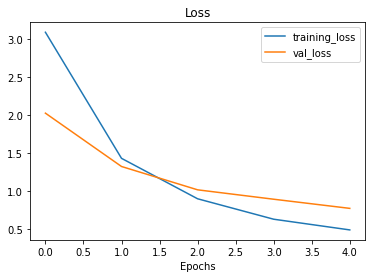

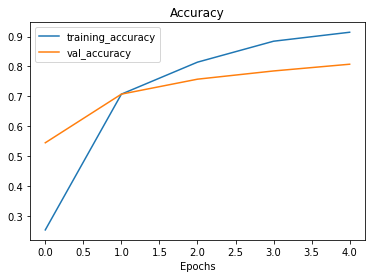

In [55]:
plot_loss_curves(ModelDogBreed_History)

In [56]:
predictions = model.predict(valid_data)
predictions

array([[4.4605918e-02, 3.9129574e-03, 5.3858303e-04, ..., 3.5156988e-02,
        2.1947837e-04, 3.2188434e-02],
       [1.2117059e-06, 1.7355496e-04, 1.7135924e-05, ..., 7.3490278e-06,
        5.9310999e-08, 2.2999563e-07],
       [9.0903387e-04, 1.5998821e-03, 3.0021432e-01, ..., 3.2234120e-03,
        4.0818486e-02, 2.8882399e-03],
       ...,
       [3.4295098e-07, 3.3851036e-05, 6.7499313e-06, ..., 1.7036018e-05,
        2.6082826e-05, 6.0575626e-06],
       [5.3116199e-02, 6.5071289e-03, 1.3980221e-03, ..., 1.6858717e-02,
        6.1950501e-04, 6.2919757e-03],
       [7.3757680e-04, 4.9466930e-02, 1.2991457e-04, ..., 1.1297663e-03,
        1.6227788e-04, 2.0918467e-03]], dtype=float32)

In [57]:
predictions.shape

(400, 50)

In [58]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {class_names[np.argmax(predictions[0])]}")

[4.4605918e-02 3.9129574e-03 5.3858303e-04 5.5959140e-04 6.8717945e-04
 2.5731793e-03 2.7311622e-04 2.2720952e-04 3.5561756e-03 1.7443161e-03
 6.6986235e-05 5.9053127e-02 5.6020089e-04 6.0706913e-01 1.6219043e-03
 2.5763541e-02 1.1804547e-03 2.3911984e-03 1.5044505e-03 2.3749385e-03
 2.6794577e-02 2.8963082e-03 6.8302280e-03 2.9632694e-03 8.4858254e-04
 4.4423738e-03 2.0025810e-03 4.0772590e-03 8.4786303e-03 2.9920381e-03
 5.0492045e-03 1.3420361e-03 5.0536171e-04 1.6028328e-03 9.7176591e-03
 1.0221591e-03 1.9176465e-03 2.3613404e-03 7.6995725e-03 8.1409477e-03
 1.0239979e-03 3.1266246e-02 4.0074796e-03 2.5871834e-02 1.2592885e-03
 2.8146438e-03 4.2429124e-03 3.5156988e-02 2.1947837e-04 3.2188434e-02]
Max value (probability of prediction): 0.6070691347122192
Sum: 1.0000001192092896
Max index: 13
Predicted label: 40


In [59]:
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return class_names[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

40

In [60]:
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(class_names[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(valid_data)
val_images[0], val_labels[0]

(array([[[0.4156863 , 0.5019608 , 0.31764707],
         [0.42352945, 0.50980395, 0.31764707],
         [0.42352945, 0.5137255 , 0.30980393],
         ...,
         [0.37647063, 0.5176471 , 0.        ],
         [0.38823533, 0.5176471 , 0.00392157],
         [0.38823533, 0.5176471 , 0.00392157]],
 
        [[0.42352945, 0.50980395, 0.31764707],
         [0.41960788, 0.5058824 , 0.3137255 ],
         [0.4156863 , 0.5058824 , 0.3019608 ],
         ...,
         [0.37254903, 0.5137255 , 0.        ],
         [0.38431376, 0.5137255 , 0.        ],
         [0.38431376, 0.5137255 , 0.        ]],
 
        [[0.43137258, 0.52156866, 0.31764707],
         [0.41960788, 0.50980395, 0.30588236],
         [0.4039216 , 0.5019608 , 0.28627452],
         ...,
         [0.3803922 , 0.50980395, 0.        ],
         [0.3803922 , 0.50980395, 0.        ],
         [0.3803922 , 0.50980395, 0.        ]],
 
        ...,
 
        [[0.14901961, 0.27450982, 0.        ],
         [0.15294118, 0.2784314 , 0.     

In [61]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

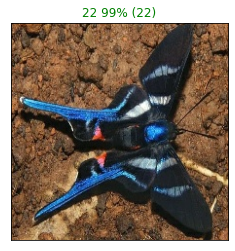

In [62]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

In [63]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = class_names[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

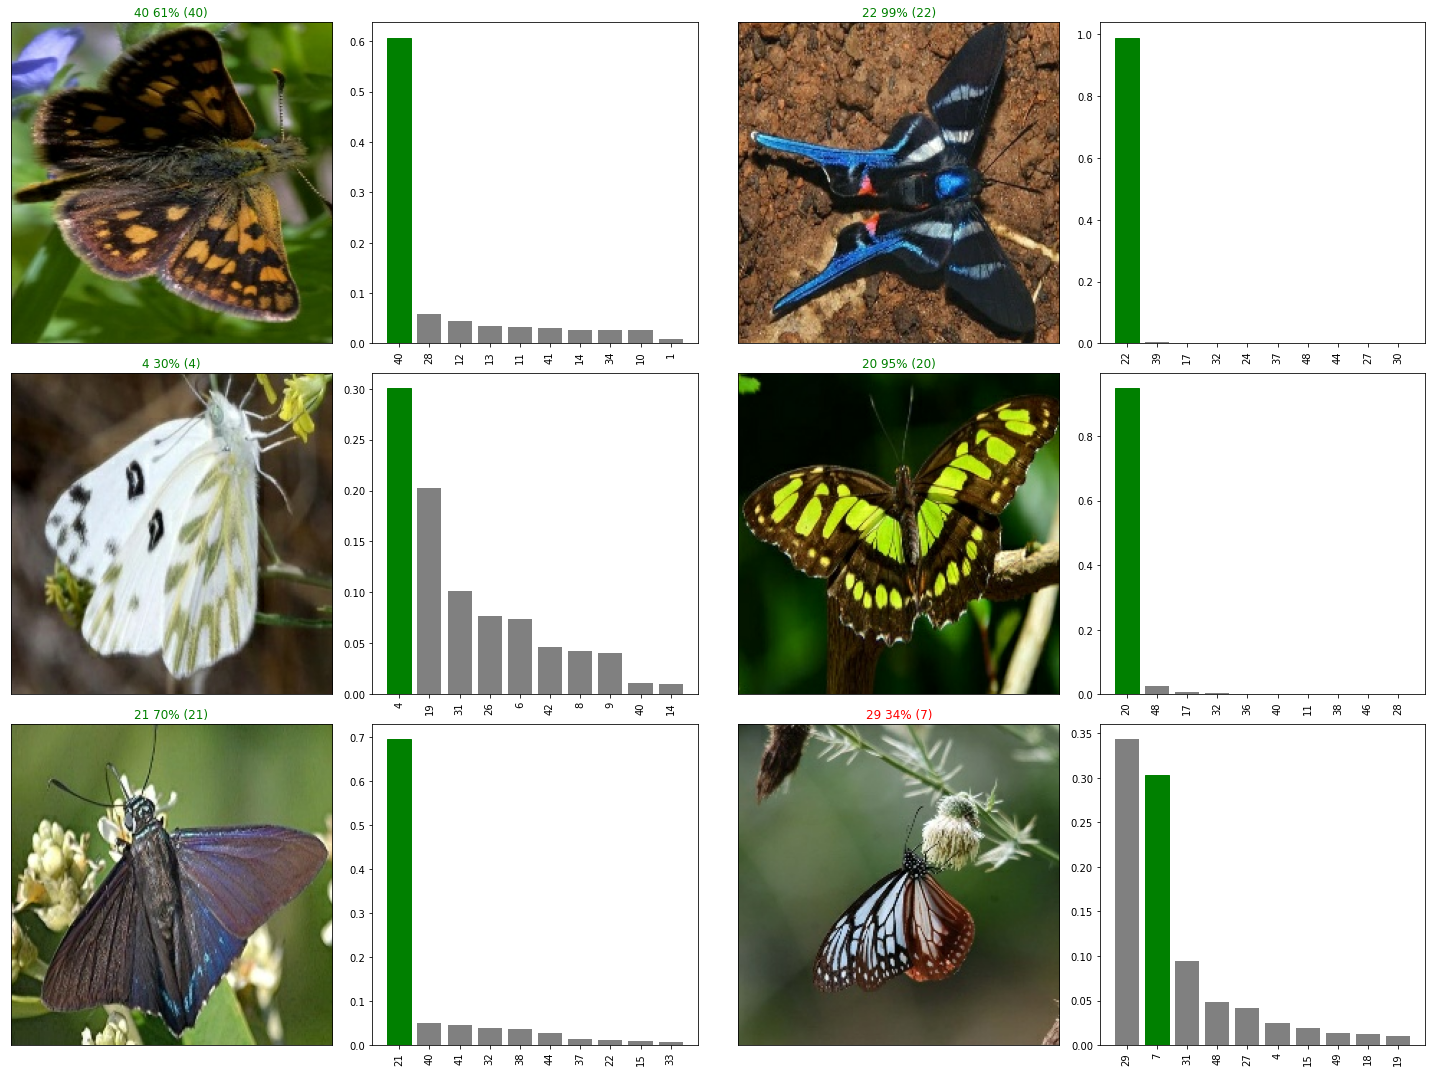

In [64]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [65]:
len(filenames), len(target_labels_encoded)

(4955, 4955)

In [67]:
full_data = create_data_batches(filenames, target_labels_encoded)

Creating Training Data


In [68]:
ModelButterflies_FullData = create_model()  #Create model
ModelButterflies_FullData.summary() 

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, None, None, 1280)  2257984  
 ional)                                                          
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 50)                64050     
                                                                 
Total params: 2,322,034
Trainable params: 64,050
Non-traina

In [70]:
FinalModelButterflies_FullData_History = ModelButterflies_FullData.fit(full_data, 
                                         steps_per_epoch = len(full_data),
                                         epochs = 15,
                                         callbacks = [EarlyStoppingCallbacks])

Epoch 1/15
155/155 [==============================] - 14s 92ms/step - loss: 1.1048 - accuracy: 0.7568
Epoch 2/15
155/155 [==============================] - 14s 92ms/step - loss: 0.5802 - accuracy: 0.8704
Epoch 3/15
155/155 [==============================] - 14s 88ms/step - loss: 0.4115 - accuracy: 0.9072
Epoch 4/15
155/155 [==============================] - 14s 87ms/step - loss: 0.3191 - accuracy: 0.9342
Epoch 5/15
155/155 [==============================] - 14s 90ms/step - loss: 0.2569 - accuracy: 0.9510
Epoch 6/15
155/155 [==============================] - 13s 86ms/step - loss: 0.2146 - accuracy: 0.9606
Epoch 7/15
155/155 [==============================] - 13s 85ms/step - loss: 0.1841 - accuracy: 0.9659
Epoch 8/15
155/155 [==============================] - 13s 82ms/step - loss: 0.1587 - accuracy: 0.9734
Epoch 9/15
155/155 [==============================] - 13s 83ms/step - loss: 0.1368 - accuracy: 0.9766
Epoch 10/15
155/155 [==============================] - 13s 83ms/step - loss: 0.120

In [78]:
test_images_path = test_images_path + 'test/'

In [79]:
test_path = "test/"
test_filenames = [test_images_path + fname for fname in os.listdir(test_images_path)]

test_filenames[:10]

['/content/final_data/test/191.jpg',
 '/content/final_data/test/25.jpg',
 '/content/final_data/test/133.jpg',
 '/content/final_data/test/232.jpg',
 '/content/final_data/test/52.jpg',
 '/content/final_data/test/167.jpg',
 '/content/final_data/test/226.jpg',
 '/content/final_data/test/64.jpg',
 '/content/final_data/test/79.jpg',
 '/content/final_data/test/100.jpg']

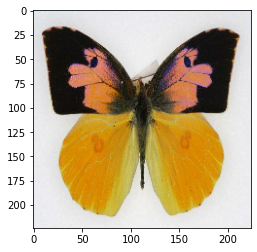

In [80]:
#View some test images 
img = imread(test_filenames[44])
plt.imshow(img)

In [82]:
test_data = create_data_batches(X=test_filenames, test_data=True)

Creating Test data


In [83]:
test_predictions = ModelButterflies_FullData.predict(test_data,
                                      verbose=1)

8/8 [==============================] - 1s 164ms/step


In [84]:
test_predictions[0]

array([2.8239567e-08, 4.3226425e-08, 2.2066722e-06, 7.8399758e-09,
       1.1612646e-07, 2.7185192e-12, 1.8262696e-08, 2.5462825e-07,
       3.9915178e-09, 4.1648654e-10, 5.8308579e-08, 3.6995456e-08,
       1.1477891e-09, 1.1330768e-03, 3.1124244e-05, 1.1344202e-07,
       3.2705781e-08, 4.4488444e-09, 8.3660183e-07, 7.6926273e-07,
       4.1547342e-04, 1.2710321e-05, 2.2736999e-09, 2.0187655e-07,
       7.2277953e-07, 9.9371028e-01, 4.9056243e-06, 1.7863129e-09,
       1.5439949e-05, 4.7023730e-07, 3.5466172e-07, 1.6077952e-06,
       2.5161688e-07, 1.8065880e-04, 1.3914838e-06, 8.4328727e-05,
       3.2814913e-03, 1.1379310e-07, 2.3381959e-09, 2.0407981e-05,
       4.0363972e-07, 1.9462013e-05, 4.2383721e-08, 4.7061593e-07,
       2.3760504e-07, 2.6951857e-10, 1.0785187e-03, 1.0886306e-06,
       7.1367245e-11, 3.8159212e-07], dtype=float32)

In [85]:
pred = np.argmax(test_predictions,1)

In [87]:
pred

array([25, 10, 36,  6,  2, 24, 34, 42, 32, 10,  8, 48,  9, 27, 48,  3, 24,
       49, 32, 33, 35, 35, 37,  7, 20, 12, 36, 18, 30, 28, 30, 30,  0, 14,
        1, 34, 46, 45,  1, 30,  8, 47, 16, 29,  3, 20, 17, 32, 35, 22, 27,
       40, 46, 20, 10,  0, 48, 31, 44, 45,  0,  2,  5, 13, 22, 33, 38, 20,
       46,  8,  9,  3,  3, 23, 31, 11, 23, 38, 13, 26, 41,  3, 14, 33, 16,
       19, 29, 27, 26, 13, 10, 31,  3, 14,  4, 22, 34,  6,  1, 30, 46, 48,
       11, 45, 35, 36,  7, 24, 31, 23, 42, 38, 21, 41, 29, 41, 42,  1, 37,
       13, 12, 44, 39, 15,  5, 10,  4, 40, 17, 15,  4, 37,  7, 28, 27, 15,
       28, 31, 38,  9, 33, 14, 25,  9, 44, 21, 11, 17,  4, 33, 20, 36,  6,
       21, 26, 49,  9, 27,  2, 17, 19, 21, 28, 40, 40, 18, 15,  2, 32, 44,
        7, 29, 24,  4, 12, 18, 43,  5, 43, 33, 12, 43,  5, 26, 15, 11, 22,
       36,  5, 19, 29, 12, 46, 34, 44,  8, 39, 23, 12, 42, 18,  0,  1, 37,
       13, 47, 45,  7, 16, 18, 21,  2, 25, 14,  5, 47, 11, 25,  0, 42, 47,
       39, 47, 16, 43, 43

In [86]:
test_filenames = [fname for fname in os.listdir(test_images_path)]
len(test_filenames)

250

In [88]:
pred_df = pd.DataFrame()
pred_df['filenames'] = test_filenames
pred_df['label'] = pred

In [89]:
pred_df.head()

,filenames,label
0,191.jpg,25
1,25.jpg,10
2,133.jpg,36
3,232.jpg,6
4,52.jpg,2


In [90]:
pred_df.to_csv('sub.csv', index=False)